In [771]:
# libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import scipy as sp

%matplotlib inline

### Q1.1 Kmeans

In [772]:
# x: =0-8
# y: 1, 7 
# centroid: x = 4, y= 1,7
x = [x/2 for x in range(15)]*2
y = [1 for x in range(15)] + [7 for x in range(15)]
x[7] = 3.4
x[22] = 3.6
X = []
for i in range(len(x)):
    X.append([x[i], y[i]])
np.savetxt("XkmeansI.csv", np.array(X), delimiter=",")

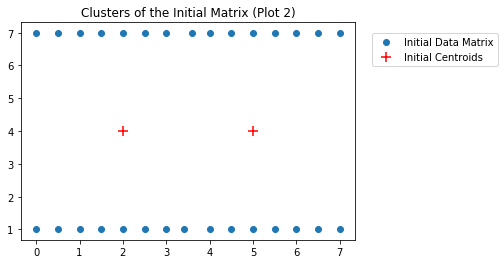

In [773]:
plt.scatter(x,y, label="Initial Data Matrix")
centers = np.array([[2, 4], [5, 4]])
np.savetxt("means.csv", np.array(centers), delimiter=",")

plt.title("Initial Matrix (Plot 1)")
plt.scatter(centers[:,0], centers[:,1], marker="+", s=100, c="red", label="Initial Centroids")
plt.legend(loc=[1.05,0.8])
plt.title("Clusters of the Initial Matrix (Plot 2)")
plt.show()
plt.clf()

In [774]:
cluster = KMeans(init=centers, n_init = 1, n_clusters=2, random_state=1).fit(X)
np.savetxt("ckmeanI.csv", np.array(cluster.labels_).astype(int), delimiter=",")
print("There are", sum(cluster.labels_), "points with label 1.")

There are 15 points with label 1.


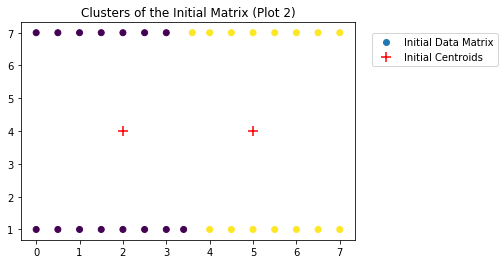

In [775]:
plt.scatter(x,y, c=cluster.labels_, label="Initial Data Matrix")
plt.scatter(centers[:,0], centers[:,1], marker="+", s=100, c="red", label="Initial Centroids")
plt.legend(loc=[1.05,0.8])
plt.title("Clusters of the Initial Matrix (Plot 2)")
plt.show()
plt.clf()

Points are evenly (15 on the left and 15 on the right) cut in the middle.

In [776]:
# add new data points in the end of original matrix
X.append([3.49, 1])
X.append([3.51, 7])
np.savetxt("XkmeansII.csv", np.array(X), delimiter=",")

cluster_new = KMeans(init=centers, n_init = 1, n_clusters=2, random_state=1).fit(X)
np.savetxt("ckmeanII.csv", np.array(cluster_new.labels_).astype(int), delimiter=",")

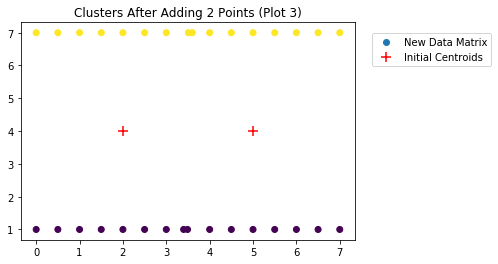

In [777]:
X=np.array(X)
plt.scatter(X[:,0],X[:,1], c=cluster_new.labels_, label="New Data Matrix")
plt.title("Clusters After Adding 2 Points (Plot 3)")
plt.scatter(centers[:,0], centers[:,1], marker="+", s=100, c="red", label="Initial Centroids")
plt.legend(loc=[1.05,0.8])
plt.show() 
plt.clf()

### Explanation Write-up

Initial idea: In order to make different results, it is necessary to let the point label different after the 1st iteration. If all points a tightly distributed, some perturbations caused by points in the middle of 2 initial cluster may make a difference. 

In our original data matrix (Plot 1 and Plot 2), points are all evenly distributed on y = 1 and 7 except points (1, 3.4) and (7, 3.6), which are slightly off to the left and to the right (repectively). Later, 2 points (3.49, 1), (3.51, 7) are added to the initial data matrix and the new clustering are shown in Plot 3. The initial centroids chosen for both clustering processes (before and after 2 points) are (2, 4), (5, 4).

The reason why we obtained 2 completely different clusters is: 
1. In plot 2, the k nearest points to our initially-chosen centroid are the right and left half of points. The k nearest points did not change after the 1st iteration and therefore the centroid converages at the middle points of the left and right clusters. Kmeans algorithm stops. 
2. In plot 3, point (3.49, 1) is slightly closer to the left initial centroid and point (3.51, 1) is slightly closer to the right initial centroid. Therefore, after the 1 iteration, the new left centroid is lower than the initially-chosen centroid. Similarily for the new right centorid, it is higher than the initial-chosen centroid. Different from the change of centroids in (1), the points that are closest to left and right centroids are changed in this time, and therefore forming new centroid. As the iteration goes on and eventually stops as the algorithm converages, the Kmeans algorithms produced a completely different result. 

### Q1.2 Single Link

In [805]:
# generate initial cluster
centers = [(5,5), (19,5)]
X_1 = make_blobs(n_samples=16, n_features=2, cluster_std=0.8, centers=centers, shuffle=False, random_state=42)[0]
centers = [(5,5), (14,5)]
X_2 = make_blobs(n_samples=14, n_features=2, cluster_std=0.8, centers=centers, shuffle=False, random_state=42)[0]
X = np.concatenate((X_1, X_2), axis=0)
np.savetxt("XslinkI.csv", np.array(X), delimiter=",")

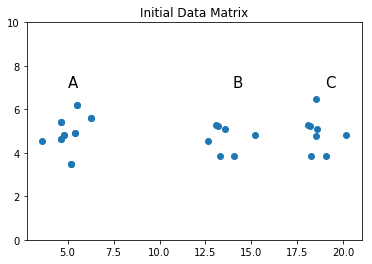

In [799]:
plt.scatter(X[:,0],X[:,1])
plt.title("Initial Data Matrix")
plt.ylim([0,10])
plt.text(5, 7, "A", fontsize=15)
plt.text(14, 7, "B", fontsize=15)
plt.text(19, 7, "C", fontsize=15)
plt.show()
plt.clf()

In [800]:
z = sp.cluster.hierarchy.linkage(X, method="single")

In [802]:
from scipy.cluster.hierarchy import fcluster
k = 2
clusters = fcluster(z, k, criterion='maxclust')

# make sure clusters only has 0 or 1
for i in range(len(clusters)):
    if clusters[i] == 2:
        clusters[i] = 0

np.savetxt("cslinkI.csv", np.array(clusters).astype(int), delimiter=",")

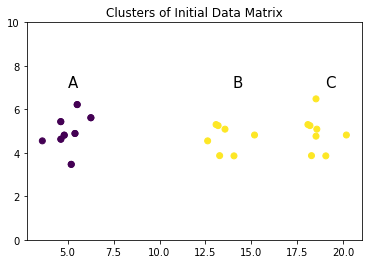

In [783]:
plt.scatter(X[:,0],X[:,1],c=clusters)
plt.title("Clusters of Initial Data Matrix")
plt.text(5, 7, "A", fontsize=15)
plt.text(14, 7, "B", fontsize=15)
plt.text(19, 7, "C", fontsize=15)
plt.ylim([0,10])
plt.show()
plt.clf()

Now add 3 more points to $X$

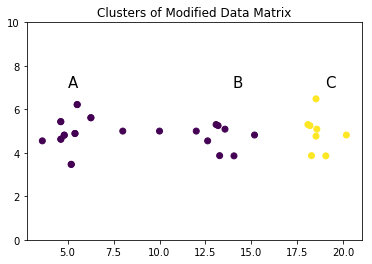

In [803]:
X = np.concatenate((X, [[8, 5]]), axis=0)
X = np.concatenate((X, [[10, 5]]), axis=0)
X = np.concatenate((X, [[12, 5]]), axis=0)
np.savetxt("XslinkII.csv", np.array(X), delimiter=",")

from scipy.cluster.hierarchy import fcluster
z = sp.cluster.hierarchy.linkage(X, method="single")
k = 2
clusters = fcluster(z, k, criterion='maxclust')

# make sure clusters only has 0 or 1
for i in range(len(clusters)):
    if clusters[i] == 2:
        clusters[i] = 0

np.savetxt("cslinkII.csv", np.array(clusters).astype(int), delimiter=",")

plt.scatter(X[:,0],X[:,1],c=clusters)
plt.title("Clusters of Modified Data Matrix")
plt.text(5, 7, "A", fontsize=15)
plt.text(14, 7, "B", fontsize=15)
plt.text(19, 7, "C", fontsize=15)
plt.ylim([0,10])
plt.show()
plt.clf()

### Explanation Write-up
In the initial data matrix, there are 3 obvious groups. Say, they are labeled A, B and C. According to the algorithm of single linkage, when clustering the initial data matrix, points are firstly clustered into groups A, B and C since there are fairly closer in the same group. As the number of groups become 3, since cluster B is closer to C instead of A, in the next iteration, B and C are clustered into ths same group, forming 2 groups: group A and group (B, C). 

As I added 3 more points to the initial matrix between group A and B, group B becomes closer to A instead of C due to the link provided by the 3 points I added. As a result, as the algorithm combines 3 groups into 2, the groups are group (A, B) and group C. 

### Q2. M3 & M4 Comparison

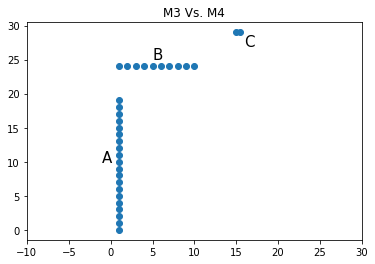

In [785]:
x = [1] * 20 + [x for x in range(1,11)] + [15, 15.5]
y = [x for x in range(20)] + [24] * 10 + [29, 29]
plt.scatter(x, y)
plt.xlim([-10,30])
plt.title("M3 Vs. M4")
plt.text(-1, 10, "A", fontsize=15)
plt.text(5, 25, "B", fontsize=15)
plt.text(16, 27, "C", fontsize=15)
#plt.ylim([-15, 40])
plt.show()

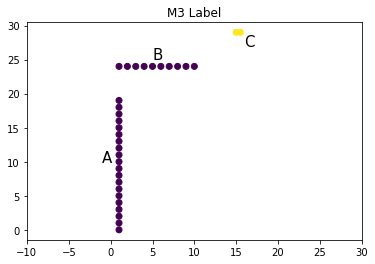

In [786]:
M3_label = [0] * 30 + [1] * 2
plt.scatter(x, y, c=M3_label)
plt.xlim([-10,30])
plt.text(-1, 10, "A", fontsize=15)
plt.text(5, 25, "B", fontsize=15)
plt.text(16, 27, "C", fontsize=15)
plt.title("M3 Label")

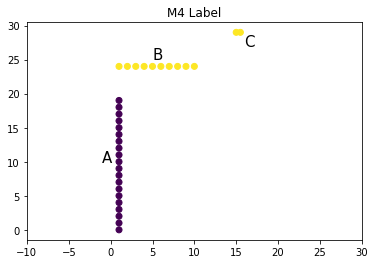

In [787]:
M4_label = [0] * 20 + [1] * 12
plt.scatter(x, y, c=M4_label)
plt.xlim([-10,30])
plt.title("M4 Label")
plt.text(-1, 10, "A", fontsize=15)
plt.text(5, 25, "B", fontsize=15)
plt.text(16, 27, "C", fontsize=15)
plt.show()

### Explanation Write-up
Since M3 maximizes the smallest between-cluster dissimilarity, in our case, the smallest dissimilarity between group A and B is 5 while that between B and C is > 5. Therefore, to make sure 2 clusters are farthest apart, the result of M3 is (group A, group B) and group C. 

Since M4 minimizes largest within-cluster dissimilarity, in our case, the largest dissimilarity between group A and B is > 25 while that between B and C is < 25. Therefore, to make sure points within each cluster are as close as possible, the result of M3 is group A and (group B, group C). 

Details showed in the following scanned photo. $\downarrow$

<img src="scan.jpeg",width=800,height=800>